## Машинное обучение 1, ПМИ ФКН ВШЭ

## Практическое домашнее задание 1

### Общая информация

Дата выдачи: 02.02.2024

Мягкий дедлайн: 23:59MSK 19.02.2024

Жесткий дедлайн: 23:59MSK 24.02.2024

### О задании

Задание состоит из двух разделов, посвященных работе с табличными данными с помощью библиотеки pandas и визуализации с помощью matplotlib. В первом разделе вам предстоит выполнить базовые задания с помощью вышеуказанных библиотек, а во втором распределить студентов по курсам. Баллы даются за выполнение отдельных пунктов. Задачи в рамках одного раздела рекомендуется решать в том порядке, в котором они даны в задании.

Задание направлено на освоение jupyter notebook (будет использоваться в дальнейших заданиях), библиотек pandas и matplotlib.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после жёсткого дедлайна нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно получить у семинариста или ассистента. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-01-pandas-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: 10 (+ еще бонусные?).

## 0. Введение

Сейчас мы находимся в jupyter-ноутбуке (или ipython-ноутбуке). Это удобная среда для написания кода, проведения экспериментов, изучения данных, построения визуализаций и других нужд, не связанных с написанием production-кода.

Ноутбук состоит из ячеек, каждая из которых может быть либо ячейкой с кодом, либо ячейкой с текстом размеченным и неразмеченным. Текст поддерживает markdown-разметку и формулы в Latex.

Для работы с содержимым ячейки используется *режим редактирования* (*Edit mode*, включается нажатием клавиши **Enter** после выбора ячейки), а для навигации между ячейками искользуется *командный режим* (*Command mode*, включается нажатием клавиши **Esc**). Тип ячейки можно задать в командном режиме либо с помощью горячих клавиш (**y** to code, **m** to markdown, **r** to edit raw text), либо в меню *Cell -> Cell type*.

После заполнения ячейки нужно нажать *Shift + Enter*, эта команда обработает содержимое ячейки: проинтерпретирует код или сверстает размеченный текст.

In [1]:
# ячейка с кодом, при выполнении которой появится output
2 + 2

4

Ячейка с неразмеченным текстом.

Попробуйте создать свои ячейки, написать какой-нибудь код и текст какой-нибудь формулой.

In [2]:
# your code

[Здесь](https://athena.brynmawr.edu/jupyter/hub/dblank/public/Jupyter%20Notebook%20Users%20Manual.ipynb) находится <s>не</s>большая заметка о используемом языке разметки Markdown. Он позволяет:

0. Составлять упорядоченные списки
1. Выделять *текст* <s>при</s> **необходимости**
2. Добавлять [ссылки](http://imgs.xkcd.com/comics/the_universal_label.png)


* Составлять неупорядоченные списки

Делать вставки с помощью LaTex:
    
$
\left\{
\begin{array}{ll}
x = 16 \sin^3 (t) \\
y = 13 \cos (t) - 5 \cos (2t) - 2 \cos (3t) - \cos (4t) \\
t \in [0, 2 \pi]
\end{array}
\right.$

А ещё можно вставлять картинки, или гифки, или что захотите:

<img src="https://media1.tenor.com/images/9b8fbe9214504bcf6c60fe4e4f7e114e/tenor.gif?itemid=5416416" style="width: 400px">

### Google Colab

Что за колаб?

**Google Colab (Colaboratory)** это **Jupyter Notebook + Cloud + Google Drive.**

Компания Google предоставляет возможность бесплатно запускать ноутбуки (предварительно загрузив их на свой гугл-диск) прямо в облаке. При этом вам не требуется установка никаких пакетов на свою машину, а работать можно прямиком из браузера. Вот ссылка:

https://colab.research.google.com

При использовании вы увидете много сходств с jupyter ноутбуком. Одним из преимуществ является доступность GPU, соответствующую опцию можно активировать в настройках сервиса. При желании вы сможете найти в интернете много туториалов по использованию или разобраться самостоятельно =)

## 1. Табличные данные и Pandas

Pandas — удобная библиотека для работы с табличными данными в Python, если данных не слишком много и они помещаются в оперативную память вашего компьютера. Несмотря на неэффективность реализации и некоторые проблемы, библиотека стала стандартом в анализе данных.

Основной объект в pandas — это DataFrame, представляющий собой таблицу с именованными колонками различных типов, индексом (может быть многоуровневым). DataFrame можно создавать, считывая таблицу из файла или задавая вручную из других объектов.

В этой части потребуется выполнить несколько небольших заданий. Можно пойти двумя путями: сначала изучить материалы, а потом приступить к заданиям, или же разбираться "по ходу". Выбирайте сами.

Материалы:
1. [Pandas за 10 минут из официального руководства](http://pandas.pydata.org/pandas-docs/stable/10min.html)
2. [Документация](http://pandas.pydata.org/pandas-docs/stable/index.html) (стоит обращаться, если не понятно, как вызывать конкретный метод)
3. [Примеры использования функционала](http://nbviewer.jupyter.org/github/justmarkham/pandas-videos/blob/master/pandas.ipynb)

Многие из заданий можно выполнить несколькими способами. Не существуют единственно верного, но попробуйте максимально задействовать арсенал pandas и ориентируйтесь на простоту и понятность вашего кода. Мы не будем подсказывать, что нужно использовать для решения конкретной задачи, попробуйте находить необходимый функционал сами (название метода чаще всего очевидно). В помощь вам документация, поиск и stackoverflow.

In [3]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


<span style="color:red">Перед выполнением задания необходимо ознакомиться с первым семинаром (seminars/sem01-pandas.ipynb) </span>.

Это поможет вам получить общее понимание происходяшего и успешнее справиться с заданием.

Также успешному выполнению способствует внимательное чтение текста задания от начала до конца.

Удачи!

Скачаем подготовленные на семинаре данные:

In [4]:
!wget  -O 'end_seminar.xlsx' -q 'https://www.dropbox.com/s/f4rm8sjc3v99p0m/_end_seminar.xlsx?dl=0'

Для пользователей Windows: скачайте файл самостоятельно и поместите его в папку с тетрадкой. Или попробуйте один из следующих вариантов:

In [5]:
# !powershell iwr -outf somefile https://somesite/somefile

In [6]:
!pip install wget
import wget
wget.download('https://dropbox.com/s/f4rm8sjc3v99p0m/_end_seminar.xlsx?dl=1', 'end_seminar.xlsx')

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=6a7896c4873c624345b3731172d75d7e7e8de0470f95c9046063a3504a6ea064
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


'end_seminar (1).xlsx'

##### В первой части задания (до раздела "Распределение студентов по курсам") использование циклов запрещается и повлечет за собой снижение оценки. Использование <code>vectorize</code> и  <code>apply</code>, <code>apply_along_axis</code> крайне нежелательно.

Для каждой задачи из этого раздела вы должны написать код для получения ответа, а также дать текстовый ответ, если он предполагается.

На некоторые вопросы вы можете получить путём пристального взгляда на таблицу, но это не будет засчитываться. Вы в любом случае должны получить ответ с помощью кода.

#### 1. [0 баллов] Откройте файл с таблицей (не забудьте про её формат). Выведите последние 10 строк.

Посмотрите на данные и скажите, что они из себя представляют, сколько в таблице строк, какие столбцы? (на это не надо отвечать, просто подумайте об этом)

In [7]:
df = pd.read_excel('end_seminar.xlsx')
df.head()

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student
0,2020-05-15 01:12:50.543,93ff79a51cd602f1dd3028ba2c129503,698,181.0,NaN,Язык SQL,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.183857,NaN,NaN,NaN
1,2020-05-15 02:46:48.066,26b01b1c4cd5656bab18d24c548834fb,647,181.0,NaN,Высокопроизводительные вычисления,Безопасность компьютерных систем,Язык SQL,Дискретная оптимизация,Численные методы,Машинное обучение 2,Нет,0.426009,NaN,NaN,NaN
2,2020-05-15 03:12:41.480,30f3653fc176d54e89ac3179c455c6dd,624,185.0,NaN,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Дискретная оптимизация,Машинное обучение 2,Численные методы,Да,0.538117,NaN,NaN,NaN
3,2020-05-15 04:43:08.994,1528f0eaa027580820ccf0d92a53ad68,579,182.0,NaN,Statistical Learning Theory,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.744395,NaN,NaN,NaN
4,2020-05-15 07:47:17.197,496ea4f0d4abe264b1bb1b80eb3830c5,572,183.0,NaN,Высокопроизводительные вычисления,Безопасность компьютерных систем,Теория баз данных,Компьютерные сети,Дискретная оптимизация,Численные методы,Да,0.780269,NaN,NaN,NaN


#### 2. [0.5 балла] Есть ли в данных пропуски? В каких колонках? Сколько их в каждой из этих колонок?

In [8]:
df.isnull().sum()

timestamp          0
id                 0
rating             0
18_group         138
is_mi            343
fall_1             0
fall_2             0
fall_3             0
spring_1           0
spring_2           0
spring_3           0
is_first_time      2
percentile         0
17_group         223
blended          223
is_ml_student    304
dtype: int64

Заполните пропуски пустой строкой для строковых колонок и нулём для числовых (постарайтесь избежать перечисления названий всех столбцов).

In [9]:
numeric_cols = df.select_dtypes(include=[int, float]).columns
numeric_cols

Index(['rating', '18_group', 'is_mi', 'percentile', '17_group',
       'is_ml_student'],
      dtype='object')

In [10]:
string_cols = df.select_dtypes(include=[object]).columns
string_cols

Index(['id', 'fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3',
       'is_first_time', 'blended'],
      dtype='object')

In [11]:
df[numeric_cols] = df[numeric_cols].fillna(0)
df[string_cols] = df[string_cols].fillna('')
print(df.isnull().sum())
df.head()

timestamp        0
id               0
rating           0
18_group         0
is_mi            0
fall_1           0
fall_2           0
fall_3           0
spring_1         0
spring_2         0
spring_3         0
is_first_time    0
percentile       0
17_group         0
blended          0
is_ml_student    0
dtype: int64


,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student
0,2020-05-15 01:12:50.543,93ff79a51cd602f1dd3028ba2c129503,698,181.0,0.0,Язык SQL,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.183857,0.0,,0.0
1,2020-05-15 02:46:48.066,26b01b1c4cd5656bab18d24c548834fb,647,181.0,0.0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Язык SQL,Дискретная оптимизация,Численные методы,Машинное обучение 2,Нет,0.426009,0.0,,0.0
2,2020-05-15 03:12:41.480,30f3653fc176d54e89ac3179c455c6dd,624,185.0,0.0,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Дискретная оптимизация,Машинное обучение 2,Численные методы,Да,0.538117,0.0,,0.0
3,2020-05-15 04:43:08.994,1528f0eaa027580820ccf0d92a53ad68,579,182.0,0.0,Statistical Learning Theory,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.744395,0.0,,0.0
4,2020-05-15 07:47:17.197,496ea4f0d4abe264b1bb1b80eb3830c5,572,183.0,0.0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Теория баз данных,Компьютерные сети,Дискретная оптимизация,Численные методы,Да,0.780269,0.0,,0.0


#### 3. [0.5 балла] Посмотрите повнимательнее на колонку 'is_first_time'.

Есть ли в ней ответы "Нет"? Сколько их?

Если вы найдете повторные обращения студентов, оставьте только самую позднюю версию. В дальнейших заданиях используйте версию данных без повторов.

<i>Обращения со значением "Нет" в 'is_first_time' могут быть как повторными, так и первичными, поскольку поле заполняли сами студенты.</i>

In [12]:
print(df.shape)
(df['is_first_time'] == 'Нет').sum()

(361, 16)


51

In [13]:
duplicates = df[df.duplicated(subset=['id'], keep=False)]
duplicates

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student
22,2020-05-15 22:15:31.902,a65d50ef4fadfac64508a54e972d8623,626,184.0,0.0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Матричные вычисления,Дискретная оптимизация,Численные методы,Анализ данных в бизнесе,Да,0.526906,0.0,,0.0
23,2020-05-15 22:30:31.902,a65d50ef4fadfac64508a54e972d8623,626,184.0,0.0,Безопасность компьютерных систем,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Анализ данных в бизнесе,Нет,0.526906,0.0,,0.0
29,2020-05-16 14:46:06.274,b121e4d7d62387cd5199cca464a34a6d,694,185.0,0.0,Теория баз данных,Безопасность компьютерных систем,Язык SQL,Машинное обучение 2,Компьютерные сети,Промышленное программирование на языке Java,Да,0.204036,0.0,,0.0
30,2020-05-16 15:01:06.274,b121e4d7d62387cd5199cca464a34a6d,694,185.0,0.0,Безопасность компьютерных систем,Теория баз данных,Язык SQL,Машинное обучение 2,Компьютерные сети,Промышленное программирование на языке Java,Нет,0.204036,0.0,,0.0
97,2020-05-18 18:38:41.094,5ee2ad618729a6dc3bdb7f2858826ef0,628,185.0,0.0,Язык SQL,Безопасность компьютерных систем,Теория баз данных,Компьютерные сети,Промышленное программирование на языке Java,Дискретная оптимизация,Да,0.513453,0.0,,0.0
98,2020-05-18 18:53:41.094,5ee2ad618729a6dc3bdb7f2858826ef0,628,185.0,0.0,Безопасность компьютерных систем,Язык SQL,Теория баз данных,Компьютерные сети,Промышленное программирование на языке Java,Дискретная оптимизация,Нет,0.513453,0.0,,0.0
121,2020-05-18 20:47:28.759,5c49473012411a1eee72f8ea63767adf,573,183.0,0.0,Язык SQL,Безопасность компьютерных систем,Теория баз данных,Промышленное программирование на языке Java,Компьютерные сети,Дискретная оптимизация,Да,0.773543,0.0,,0.0
126,2020-05-18 21:02:28.759,5c49473012411a1eee72f8ea63767adf,573,183.0,0.0,Безопасность компьютерных систем,Язык SQL,Теория баз данных,Промышленное программирование на языке Java,Компьютерные сети,Дискретная оптимизация,Нет,0.773543,0.0,,0.0
129,2020-05-18 21:12:02.445,ffc58d371e2f52e1c7f45d49d3d629d0,659,187.0,0.0,Сбор и обработка данных с помощью краудсорсинга,Матричные вычисления,Моделирование временных рядов,Системы баз данных,Промышленное программирование на языке Java,Дополнительные главы прикладной статистики,Да,0.369955,0.0,,1.0
139,2020-05-18 21:27:02.445,ffc58d371e2f52e1c7f45d49d3d629d0,659,187.0,0.0,Матричные вычисления,Сбор и обработка данных с помощью краудсорсинга,Моделирование временных рядов,Системы баз данных,Промышленное программирование на языке Java,Дополнительные главы прикладной статистики,Нет,0.369955,0.0,,1.0


In [14]:
df_no_dup = df.sort_values(by=['timestamp'], ascending=False).drop_duplicates(subset=['id'])

print("Проверим, что удалили правильно")
df_no_dup[df_no_dup['id'].isin(duplicates['id'])]

Проверим, что удалили правильно


,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student
204,2020-05-18 23:55:41.196,47e2d8bbb630bc2d9b3fbf98fe77cffb,616,188.0,0.0,Сбор и обработка данных с помощью краудсорсинга,Язык SQL,Высокопроизводительные вычисления,Компьютерные сети,Промышленное программирование на языке Java,Машинное обучение 2,Нет,0.576233,0.0,,0.0
192,2020-05-18 23:35:28.235,86c24daaa62246142d46ee58534a65e0,530,184.0,0.0,Сбор и обработка данных с помощью краудсорсинга,Моделирование временных рядов,Теория баз данных,Анализ данных в бизнесе,Численные методы,Системы баз данных,Нет,0.939462,0.0,,0.0
342,2020-05-18 23:24:48.715,50f6d5b6a7fd6c8b1b8959f9ce1f808d,1086,0.0,0.0,Анализ неструктурированных данных,Глубинное обучение в обработке звука,Моделирование временных рядов,Обучение с подкреплением,Методы сжатия и передачи медиаданных,Проектирование и разработка высоконагруженных ...,Нет,0.764493,174.0,DevOps,0.0
176,2020-05-18 22:51:34.323,8aa0f1b7331b49464174b02cd693be52,567,187.0,0.0,Безопасность компьютерных систем,Язык SQL,Теория баз данных,Компьютерные сети,Промышленное программирование на языке Java,Системы баз данных,Нет,0.795964,0.0,,0.0
325,2020-05-18 22:40:28.531,d9c068e5578253c2b0721558dd0813e1,1075,0.0,0.0,Анализ неструктурированных данных,Statistical Learning Theory,Принятие решений в условиях риска и неопределё...,Конфликты и кооперация,Обучение с подкреплением,Символьные вычисления,Нет,0.807971,174.0,DevOps,0.0
152,2020-05-18 21:51:52.845,9015b809a29fb65ce23d7addf16d770d,665,188.0,1.0,Язык SQL,Моделирование временных рядов,Матричные вычисления,Машинное обучение 2,Промышленное программирование на языке Java,Компьютерные сети,Нет,0.338565,0.0,,0.0
150,2020-05-18 21:49:22.233,f8fab519d78047712c06798c8b7fe38f,561,185.0,1.0,Моделирование временных рядов,Теория баз данных,Язык SQL,Промышленное программирование на языке Java,Машинное обучение 2,Компьютерные сети,Нет,0.822870,0.0,,0.0
139,2020-05-18 21:27:02.445,ffc58d371e2f52e1c7f45d49d3d629d0,659,187.0,0.0,Матричные вычисления,Сбор и обработка данных с помощью краудсорсинга,Моделирование временных рядов,Системы баз данных,Промышленное программирование на языке Java,Дополнительные главы прикладной статистики,Нет,0.369955,0.0,,1.0
126,2020-05-18 21:02:28.759,5c49473012411a1eee72f8ea63767adf,573,183.0,0.0,Безопасность компьютерных систем,Язык SQL,Теория баз данных,Промышленное программирование на языке Java,Компьютерные сети,Дискретная оптимизация,Нет,0.773543,0.0,,0.0
302,2020-05-18 20:23:36.111,9a66d84568b8017d98eb2e678b57296b,1205,0.0,0.0,Анализ неструктурированных данных,Глубинное обучение в обработке звука,Байесовские методы машинного обучения,Обучение с подкреплением,Генеративные модели в машинном обучении,Компьютерное зрение,Нет,0.293478,171.0,DevOps,0.0


In [15]:
print(df_no_dup.shape)
(df_no_dup['is_first_time'] == 'Нет').sum()

(347, 16)


51

#### 4. [0.5 балла] Ответьте на вопросы:
1. Сколько было заявок из групп 18-го года набора, а сколько из групп 17-го года?
2. Есть ли студенты с равными перцентилями (среди объединенных данных, ведь конкурс на каждый курс общий)?

In [16]:
group_18_nonzero = (df_no_dup[df_no_dup['18_group'] != 0.0]['18_group'].value_counts()).sum()
group_18_zero = (df_no_dup[df_no_dup['18_group'] == 0.0]['18_group'].value_counts()).sum()

group_17_nonzero = (df_no_dup[df_no_dup['17_group'] != 0.0]['17_group'].value_counts()).sum()
group_17_zero = (df_no_dup[df_no_dup['17_group'] == 0.0]['17_group'].value_counts()).sum()

print(f"Заявок из групп 18-го набора = {group_18_nonzero} (для проверки в 17 году нулевых - {group_17_zero})")
print(f"Заявок из групп 17-го набора = {group_17_nonzero} (для проверки в 18 году нулевых - {group_18_zero})")

Заявок из групп 18-го набора = 213 (для проверки в 17 году нулевых - 213)
Заявок из групп 17-го набора = 134 (для проверки в 18 году нулевых - 134)


In [17]:
df_no_dup[df_no_dup.duplicated(subset=['percentile'], keep=False)]

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student
80,2020-05-18 17:09:23.589,3e106aaef8b24dbb01319c73e14c2936,784,182.0,0.0,Безопасность компьютерных систем,Statistical Learning Theory,Матричные вычисления,Дискретная оптимизация,Промышленное программирование на языке Java,Дополнительные главы прикладной статистики,Да,0.0,0.0,,1.0
231,2020-05-14 21:52:43.844,3a7326c9e355a67d3805824ca34c4bc5,1457,0.0,0.0,Statistical Learning Theory,Высокопроизводительные вычисления,Statistical Learning Theory,Символьные вычисления,Численные методы,Символьные вычисления,Да,0.0,173.0,Введение в дифференциальную геометрию,0.0


#### 5. [0.5 балла] Какие  blended-курсы для четверокурсников существуют? На какой blended-курс записалось наибольшее количество студентов? На каком из blended-курсов собрались студенты с самым высоким средним рейтингом (выведите этот курс и количество студентов на нем)?

In [18]:
blended_courses = df_no_dup[df_no_dup["blended"] != ""]["blended"].unique()
print(*blended_courses, sep="\n")

Соревновательный анализ данных
DevOps
Введение в дифференциальную геометрию


In [19]:
# blended_courses = df_no_dup[df_no_dup["blended"] != ""]
# blended_courses

In [20]:
blended_courses = df_no_dup[df_no_dup["blended"] != ""]
# print(blended_courses)
blended_courses_counts = blended_courses.groupby("blended").size()
print(blended_courses_counts)

max_students_course = blended_courses_counts.idxmax()
print(f"Наибольшее количество студентов записалось на курс {max_students_course}")

blended
DevOps                                   87
Введение в дифференциальную геометрию    15
Соревновательный анализ данных           32
dtype: int64
Наибольшее количество студентов записалось на курс DevOps


In [21]:
blended_courses_counts_mean = blended_courses.groupby("blended")["rating"].mean()
print(blended_courses_counts_mean)

max_mean = blended_courses_counts_mean.idxmax()
print(f"Наибольшее количество студентов записалось на курс {max_mean}")

blended
DevOps                                   1154.172414
Введение в дифференциальную геометрию    1210.733333
Соревновательный анализ данных           1144.218750
Name: rating, dtype: float64
Наибольшее количество студентов записалось на курс Введение в дифференциальную геометрию


#### 6. [1 балл] Выясните, есть ли студенты с абсолютно одинаковыми предпочтениями по всем курсам.

Для этого сформируйте таблицу, где для каждого возможного набора курсов посчитано количество студентов, выбравших такой набор, и оставьте только строки где это количество больше 1.

В данном случае набор курсов задается упорядоченным множеством ('fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3', 'blended'). Элемент blended будет нулевым для 3-го курса.

In [22]:
df_copy = df_no_dup.copy()
df_copy['course_set'] = df.apply(lambda row: tuple(x for x in sorted([row["fall_1"], row["fall_2"], row["fall_3"], row["spring_1"], row["spring_2"], row["spring_3"], row["blended"]]) if x != ""), axis=1)

all_sets = df_copy.groupby("course_set").size()
display(all_sets[all_sets > 1])
all_sets[all_sets > 1].reset_index(name="count")

course_set
(DevOps, Statistical Learning Theory, Анализ неструктурированных данных, Компьютерное зрение, Конфликты и кооперация, Обучение с подкреплением, Сбор и обработка данных с помощью краудсорсинга)                                                                   2
(DevOps, Анализ неструктурированных данных, Байесовские методы машинного обучения, Генеративные модели в машинном обучении, Глубинное обучение в обработке звука, Компьютерное зрение, Обучение с подкреплением)                                                   6
(DevOps, Анализ неструктурированных данных, Байесовские методы машинного обучения, Генеративные модели в машинном обучении, Компьютерное зрение, Обучение с подкреплением, Сбор и обработка данных с помощью краудсорсинга)                                        3
(DevOps, Анализ неструктурированных данных, Байесовские методы машинного обучения, Компьютерное зрение, Обучение с подкреплением, Проектирование и разработка высоконагруженных сервисов, Сбор и обработка дан

,course_set,count
0,"(DevOps, Statistical Learning Theory, Анализ н...",2
1,"(DevOps, Анализ неструктурированных данных, Ба...",6
2,"(DevOps, Анализ неструктурированных данных, Ба...",3
3,"(DevOps, Анализ неструктурированных данных, Ба...",2
4,"(DevOps, Анализ неструктурированных данных, Бе...",3
5,"(DevOps, Анализ неструктурированных данных, Бе...",2
6,"(DevOps, Анализ неструктурированных данных, Ге...",2
7,"(DevOps, Безопасность компьютерных систем, Выс...",2
8,"(DevOps, Безопасность компьютерных систем, Выс...",2
9,"(DevOps, Безопасность компьютерных систем, Выс...",2


#### 7. [0.5 балла] Найдите курсы по выбору, на которые записывались как студенты 18-го года набора, так и студенты 17-го года.

In [23]:
students_18 = df_no_dup[df_no_dup['18_group'] != 0]
students_17 = df_no_dup[df_no_dup['17_group'] != 0]

courses_18 = set(students_18[['fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3', 'blended']].values.flatten())
courses_17 = set(students_17[['fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3', 'blended']].values.flatten())

courses_intersection = courses_18.intersection(courses_17)
courses_intersection

{'Statistical Learning Theory',
 'Безопасность компьютерных систем',
 'Высокопроизводительные вычисления',
 'Моделирование временных рядов',
 'Принятие решений в условиях риска и неопределённости',
 'Сбор и обработка данных с помощью краудсорсинга',
 'Численные методы'}

Методом исключения найдите курсы, которые предлагались только студентам 18-го года и только студентам 17-го года.

In [24]:
print("Курсы, предлагаемые только студентам 18-го года:")
for course in (courses_18 - courses_17):
    print(course)

print("\nКурсы, предлагаемые только студентам 17-го года:")
for course in (courses_17 - courses_18):
    print(course)

Курсы, предлагаемые только студентам 18-го года:

Теория баз данных
Матричные вычисления
Анализ данных в бизнесе
Компьютерные сети
Язык SQL
Дополнительные главы прикладной статистики
Системы баз данных
Машинное обучение 2
Дискретная оптимизация
Промышленное программирование на языке Java

Курсы, предлагаемые только студентам 17-го года:
Компьютерное зрение
Глубинное обучение в обработке звука
Символьные вычисления
DevOps
Генеративные модели в машинном обучении
Анализ неструктурированных данных
Конфликты и кооперация
Соревновательный анализ данных
Введение в дифференциальную геометрию
Обучение с подкреплением
Байесовские методы машинного обучения
Методы сжатия и передачи медиаданных
Проектирование и разработка высоконагруженных сервисов


### Визуализации и matplotlib

При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные. Здесь будут описаны ключевые правила оформления графиков для **всех** домашних заданий.

У matplotlib, конечно же, есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторой величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

В этом задании вы попробуете построить один из них. Не забывайте про базовые принципы построения приличных графиков:
- оси должны быть подписаны, причём не слишком мелко;
- у графика должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах);
- сетка на графике помогает оценить значения в точках на глаз, это обычно полезно, поэтому лучше ее отрисовывать;
- если распределение на гистограмме имеет тяжёлые хвосты, лучше использовать логарифмическую шкалу.

Еще одна билиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html) (обычно сокращается до sns). Это настройка над matplotlib, иногда удобнее и красивее делать визуализации через неё.

**5 пунктов после которых ваши графики не будут прежними:**
- для красивой картинки <code>%config InlineBackend.figure_format = 'retina'</code>
- задаем размер (почти) всех графиков (можно выбрать другие значения) <code>plt.rcParams['figure.figsize'] = 8, 5</code>
- размер шрифта подписей графиков <code>plt.rcParams['font.size'] = 12</code>
- формат в котором сохраняется изображение <code>mpl.rcParams['savefig.format'] = 'pdf'</code>
- sns – seaborn, добавляет решетку <code>sns.set_style('darkgrid')</code>

Добавьте эти функции в ячейку ниже. Каждый график все равно придется настраивать отдельно, но указанные строчки позволят значительно упростить процесс.  

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 8, 6
plt.rcParams['font.size'] = 10
plt.rcParams['savefig.format'] = 'pdf'
sns.set_style('darkgrid')

#### 8. [0.5 балла] Постройте график средних рейтингов по дням получения ответов (bar plot).

<ipython-input-26-81ee02921ab7>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day', y='rating', data=mean_ratings_by_day, palette='viridis')


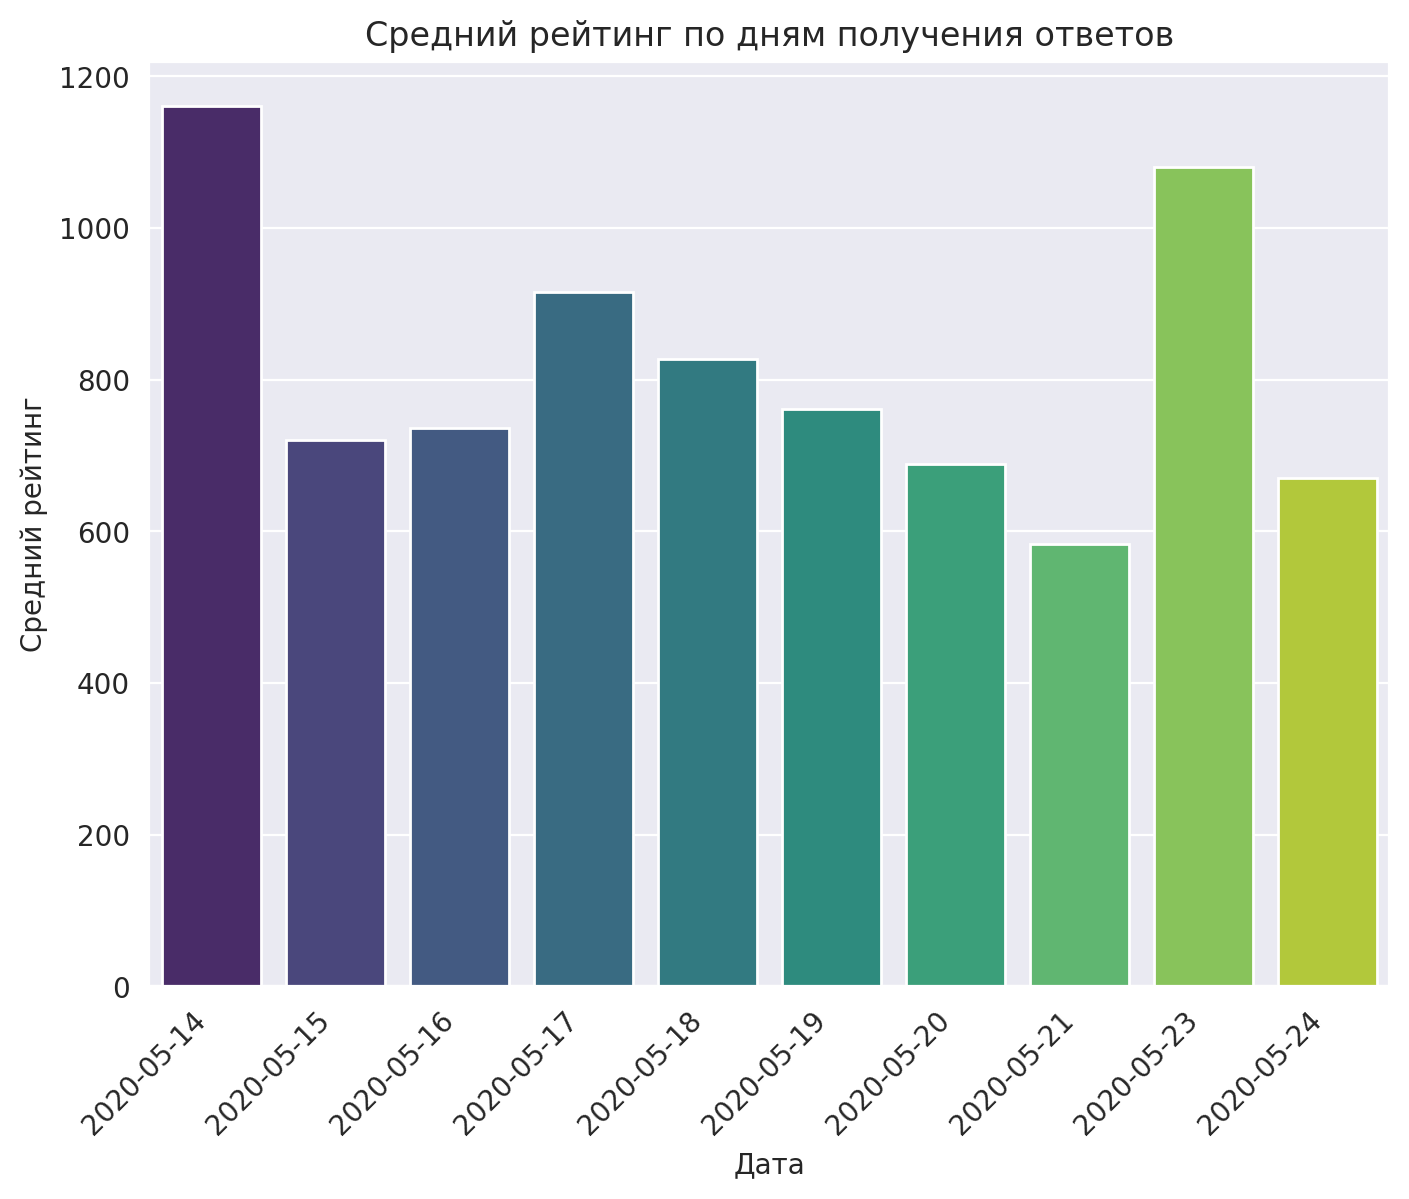

In [26]:
df_copy = df_no_dup.copy()

df_copy['day'] = df_copy['timestamp'].dt.date

mean_ratings_by_day = df_copy.groupby('day')['rating'].mean().reset_index()

sns.barplot(x='day', y='rating', data=mean_ratings_by_day, palette='viridis')
plt.title('Средний рейтинг по дням получения ответов')
plt.xlabel('Дата')
plt.ylabel('Средний рейтинг')
plt.xticks(rotation=45, ha='right')
plt.savefig("graph.pdf")
plt.show()

Сохраните график в формате pdf (так он останется векторизованным).

In [27]:
# Сохранил в предыдущем

### 2. Распределение студентов по курсам.

<span style="color:red">!!!ВНИМАТЕЛЬНО ИЗУЧИТЕ ТЕКСТ НИЖЕ!!!</span>.

<span style="color:orange">Если во время выполнения заданий у вас вознинут вопросы -- еще раз перечитайте текст целиком, скорее всего ответы уже содержатся в нем.</span>

Теперь вам нужно распределить студентов по осенним курсам по выбору, учитывая их предпочтения.

Алгоритм распределения студентов по курсам:
1. По умолчанию на каждой дисциплине по выбору у 3 и 4 курсов может учиться 1 группа (до 30 студентов). Исключения описаны ниже. На blended-дисциплинах для четверокурсников количество мест не ограничено.
2. Проводится первая волна отбора. Для каждой дисциплины формируется список тех, кто указал её первым приоритетом (если студент должен выбрать два курса по выбору, то для него дисциплины, которые он указал первым и вторым приоритетом, рассматриваются как дисциплины первого приоритета). Если желающих больше, чем мест, то выбирается топ по перцентилю рейтинга.
3. На дисциплинах, где остались места после первой волны, формируются списки тех, кто выбрал их вторым приоритетом и еще не прошел на необходимое количество курсов. Места заполняются лучшими по перцентилю рейтинга студентами. После этого проводится такая же процедура для дисциплин третьего приоритета.
4. Если студент не попал на необходимое количество курсов по итогам трёх волн, с ним связывается учебный офис и решает вопрос в индивидуальном порядке.

Обращаем ваше внимание на следующие детали:
- Конкурс на каждый курс общий для 3-го и 4-го курса

- По умолчанию студент выбирает один осенний и один весенний курс по выбору, а также четверокурсники выбирают один blended-курс. Студенты групп 17-го года специализаций МОП и ТИ выбирают по 2 осенних и 2 весенних курса по выбору, также студенты групп 18' специализации МИ выбирают 2 осенних курса. <i>Для студентов, которые выбирают 2 курса (например, осенних) первый приоритет — <code>fall_1</code> и <code>fall_2</code>, второй приоритет — <code>fall_3</code>. Такие студенты участвуют только в двух волнах отбора</i>.

- Студенты специализации МОП не могут выбрать весенним курсом по выбору Машинное обучение 2. **Если студент специализации МОП выбрал Машинное обучение 2, то его приоритеты сдвигаются.** Из-за совпадений первого и второго курса по выбору двигать приоритеты не надо.

- Blended-курсы не трогайте, по ним не надо распределять, на другие курсы они никак не влияют.

- Заведомо известно, что в процессе распределения не возникнет ситуации, когда на одно место претендуют студенты с одинаковым перцентилем.

- Постарайтесь воздержаться от использования циклов там, где это возможно. <i>Допустимо итерироваться по <b>курсам</b>, на которые проводится отбор, и по <b>волнам</b> отбора. Если вы придумаете, как обойтись и без этих циклов, то на усмотрение проверяющего могут быть добавлены бонусные баллы. <b>Дублирование кода не признается успешным избавлением от циклов</b></i>

- На выходе ожидается файл res_fall.csv с результатами распределения на осенние курсы по выбору. Файл должен быть следующего формата:

    * Три колонки: ID, course1, course2
    
    * Если студент не попал на курс, но должен был, то вместо названия курса в ячейке должна быть строка "???"
    
    * Если студент должен выбрать только один курс, то в колонке course2 для него должна стоять строка "-"
    
    * Если студент должен выбрать два курса по выбору, то порядок в колонках course1 и course2 не важен.
    
    * hint: для сохранения воспользуйтесь df.to_csv('solution.csv', index=None)
    

Для работы вам могут понадобиться следующие данные:

- Результаты опроса (вы уже использовали этот файл в первой части задания, но на всякий случай ссылка: https://www.dropbox.com/s/f4rm8sjc3v99p0m/_end_seminar.xlsx?dl=0)

- Соответствие номеров групп специализациям:

    * 171, 172 - МОП; 173 - ТИ; 174 — АДИС; 175, 176 — РС; 177 — АПР
    
    * У студентов 18-го года номера групп соответствуют номерам до распределения по специализациям. Это означает, что по номеру группы 18* нельзя однозначно определить специализацию студента. При этом в рамках распределения важно знать информацию только о двух из них: МОП и МИ. Эти знание можно получить из колонок 'is_ml_student
' и 'is_mi' соответственно.

- Ограничения по количеству мест на курсах по выбору:

    * Осенние: везде 30 мест, кроме Statistical Learning Theory (60 мест), Высокопроизводительных вычислений (60 мест), Анализа неструктурированных данных ($\infty$ мест)

    * Весенние: везде 30 мест, кроме Обучения с подкреплением (60 мест), Анализа данных в бизнесе (60 мест).


Кстати, убедитесь, что в данных больше нет пропусков и повторных записей.

#### 0. Проверка

Для начала давайте убедимся, что вы успешно выполнили задания первой части и проверим ваши данные на наличие пропусков и повторов:

In [28]:
df = df_no_dup

In [29]:
assert df.shape[0] == 347, 'В таблице остались повторы или потеряны данные'

assert df.isna().sum().sum() == 0, 'В таблице остались пропуски'

Если вы не получили AssertionError, то можете продолжать.

#### 1. [1 балл] Создайте новый признак, обозначающий, сколько осенних курсов должен выбрать студент

В этом вам может помочь информация о специализации и группе стундента.

In [30]:
df["courses_amount"] = df.apply(lambda row: 2 if ((row["17_group"] in [171, 172, 173]) or row["is_mi"] == 1) else 1, axis=1)

df.head()

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student,courses_amount
222,2020-05-24 01:23:31.946,9d19b0d5f4fc8d7edc2258406f872c4e,695,188.0,0.0,Безопасность компьютерных систем,Язык SQL,Высокопроизводительные вычисления,Компьютерные сети,Дискретная оптимизация,Численные методы,,0.197309,0.0,,0.0,1
221,2020-05-24 01:21:31.946,04bcb5c9d23813ffa940e1febb27fadc,646,186.0,0.0,Теория баз данных,Высокопроизводительные вычисления,Безопасность компьютерных систем,Компьютерные сети,Дискретная оптимизация,Машинное обучение 2,Нет,0.430493,0.0,,0.0,1
360,2020-05-23 21:16:40.916,f2d210ace25a841e1e58036b257d5d47,1195,0.0,0.0,Анализ неструктурированных данных,Моделирование временных рядов,Высокопроизводительные вычисления,Обучение с подкреплением,Компьютерное зрение,Методы сжатия и передачи медиаданных,,0.369565,176.0,Соревновательный анализ данных,0.0,1
359,2020-05-23 21:16:40.916,79d14db48e4737af731960ae212d5134,966,0.0,0.0,Безопасность компьютерных систем,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Компьютерное зрение,Да,0.985507,172.0,DevOps,0.0,2
220,2020-05-21 16:33:15.899,1341f488fae5f1ccf164960fd6506cd0,584,188.0,0.0,Язык SQL,Теория баз данных,Безопасность компьютерных систем,Промышленное программирование на языке Java,Компьютерные сети,Системы баз данных,Да,0.721973,0.0,,0.0,1


Проверка:

In [31]:
col_name = "courses_amount"   # insert your new column name as str

assert(df[df['id'] == '2662600c2c37e11e62f6ee0b88452f22'][col_name] == 2).all()
assert(df[df['id'] == 'd555d2805e1d93d4f023e57dc4c8f403'][col_name] == 2).all()
assert(df[df['id'] == '8fe79f84f36e3a5d2d6745621321302c'][col_name] == 1).all()
assert(df[df['id'] == 'e4caca755ee0bdd711e18fb8084958b5'][col_name] == 1).all()

#### 2. [2 балла] Распределите студентов в соответствии с первым приоритетом

In [112]:
# Осенние: везде 30 мест, кроме Statistical Learning Theory (60 мест), Высокопроизводительных вычислений (60 мест), Анализа неструктурированных данных ($\infty$ мест)
# Весенние: везде 30 мест, кроме Обучения с подкреплением (60 мест), Анализа данных в бизнесе (60 мест).

all_courses = set(df['fall_1']) | set(df['fall_2']) | set(df['fall_3']) | set(df['spring_1']) | set(df['spring_2']) | set(df['spring_3'])
course_students = {c: 30 if (c not in [
    "Statistical Learning Theory", "Высокопроизводительные вычисления", "Обучение с подкреплением", "Анализ данных в бизнесе"
]) else 60 for c in all_courses}

course_students["Анализ неструктурированных данных"] = df.shape[0]
course_students

{'Численные методы': 30,
 'Сбор и обработка данных с помощью краудсорсинга': 30,
 'Язык SQL': 30,
 'Statistical Learning Theory': 60,
 'Принятие решений в условиях риска и неопределённости': 30,
 'Промышленное программирование на языке Java': 30,
 'Проектирование и разработка высоконагруженных сервисов': 30,
 'Компьютерное зрение': 30,
 'Анализ данных в бизнесе': 60,
 'Дополнительные главы прикладной статистики': 30,
 'Системы баз данных': 30,
 'Безопасность компьютерных систем': 30,
 'Методы сжатия и передачи медиаданных': 30,
 'Теория баз данных': 30,
 'Генеративные модели в машинном обучении': 30,
 'Компьютерные сети': 30,
 'Конфликты и кооперация': 30,
 'Обучение с подкреплением': 60,
 'Машинное обучение 2': 30,
 'Глубинное обучение в обработке звука': 30,
 'Символьные вычисления': 30,
 'Матричные вычисления': 30,
 'Высокопроизводительные вычисления': 60,
 'Анализ неструктурированных данных': 347,
 'Моделирование временных рядов': 30,
 'Дискретная оптимизация': 30,
 'Байесовские ме

In [113]:
df_fall = df.copy()
df_fall['course1'] = ""
df_fall['course2'] = ""
df_fall.head()

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student,courses_amount,course1,course2
222,2020-05-24 01:23:31.946,9d19b0d5f4fc8d7edc2258406f872c4e,695,188.0,0.0,Безопасность компьютерных систем,Язык SQL,Высокопроизводительные вычисления,Компьютерные сети,Дискретная оптимизация,Численные методы,,0.197309,0.0,,0.0,1,,
221,2020-05-24 01:21:31.946,04bcb5c9d23813ffa940e1febb27fadc,646,186.0,0.0,Теория баз данных,Высокопроизводительные вычисления,Безопасность компьютерных систем,Компьютерные сети,Дискретная оптимизация,Машинное обучение 2,Нет,0.430493,0.0,,0.0,1,,
360,2020-05-23 21:16:40.916,f2d210ace25a841e1e58036b257d5d47,1195,0.0,0.0,Анализ неструктурированных данных,Моделирование временных рядов,Высокопроизводительные вычисления,Обучение с подкреплением,Компьютерное зрение,Методы сжатия и передачи медиаданных,,0.369565,176.0,Соревновательный анализ данных,0.0,1,,
359,2020-05-23 21:16:40.916,79d14db48e4737af731960ae212d5134,966,0.0,0.0,Безопасность компьютерных систем,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Компьютерное зрение,Да,0.985507,172.0,DevOps,0.0,2,,
220,2020-05-21 16:33:15.899,1341f488fae5f1ccf164960fd6506cd0,584,188.0,0.0,Язык SQL,Теория баз данных,Безопасность компьютерных систем,Промышленное программирование на языке Java,Компьютерные сети,Системы баз данных,Да,0.721973,0.0,,0.0,1,,


In [114]:
distributed_students = {}

for course in all_courses:
    students_for_course = df_fall[(df_fall['fall_1'] == course) | ((df_fall['courses_amount'] == 2) & (df_fall['fall_2'] == course))]
    sorted_students = students_for_course.sort_values(by=['percentile'])
    seats = course_students[course]
    distributed_students[course] = sorted_students[:seats]['id']
    course_students[course] -= len(distributed_students[course])

for course, students in distributed_students.items():
    print(f"Для курса {course}\n распределено студентов: {len(students)}. \n Осталось {course_students[course]} мест")
    # if course in ("Анализ неструктурированных данных", "Сбор и обработка данных с помощью краудсорсинга"):
    #     display(students)

    # df_fall.loc[df_fall['id'].isin(students), 'course1'] = course
    df_fall.loc[df_fall['id'].isin(students) & (df_fall['course1'] != ""), 'course2'] = course
    df_fall.loc[df_fall['id'].isin(students) & (df_fall['course1'] == ""), 'course1'] = course

Для курса Численные методы
 распределено студентов: 0. 
 Осталось 30 мест
Для курса Сбор и обработка данных с помощью краудсорсинга
 распределено студентов: 30. 
 Осталось 0 мест
Для курса Язык SQL
 распределено студентов: 29. 
 Осталось 1 мест
Для курса Statistical Learning Theory
 распределено студентов: 33. 
 Осталось 27 мест
Для курса Принятие решений в условиях риска и неопределённости
 распределено студентов: 8. 
 Осталось 22 мест
Для курса Промышленное программирование на языке Java
 распределено студентов: 0. 
 Осталось 30 мест
Для курса Проектирование и разработка высоконагруженных сервисов
 распределено студентов: 0. 
 Осталось 30 мест
Для курса Компьютерное зрение
 распределено студентов: 0. 
 Осталось 30 мест
Для курса Анализ данных в бизнесе
 распределено студентов: 0. 
 Осталось 60 мест
Для курса Дополнительные главы прикладной статистики
 распределено студентов: 0. 
 Осталось 30 мест
Для курса Системы баз данных
 распределено студентов: 0. 
 Осталось 30 мест
Для курса Бе

In [118]:
display(df_fall['course1'].unique())

df_fall.head()

array(['Безопасность компьютерных систем', 'Теория баз данных',
       'Анализ неструктурированных данных',
       'Принятие решений в условиях риска и неопределённости', 'Язык SQL',
       'Statistical Learning Theory', '',
       'Сбор и обработка данных с помощью краудсорсинга',
       'Глубинное обучение в обработке звука',
       'Высокопроизводительные вычисления', 'Матричные вычисления',
       'Моделирование временных рядов',
       'Байесовские методы машинного обучения'], dtype=object)

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student,courses_amount,course1,course2
222,2020-05-24 01:23:31.946,9d19b0d5f4fc8d7edc2258406f872c4e,695,188.0,0.0,Безопасность компьютерных систем,Язык SQL,Высокопроизводительные вычисления,Компьютерные сети,Дискретная оптимизация,Численные методы,,0.197309,0.0,,0.0,1,Безопасность компьютерных систем,
221,2020-05-24 01:21:31.946,04bcb5c9d23813ffa940e1febb27fadc,646,186.0,0.0,Теория баз данных,Высокопроизводительные вычисления,Безопасность компьютерных систем,Компьютерные сети,Дискретная оптимизация,Машинное обучение 2,Нет,0.430493,0.0,,0.0,1,Теория баз данных,
360,2020-05-23 21:16:40.916,f2d210ace25a841e1e58036b257d5d47,1195,0.0,0.0,Анализ неструктурированных данных,Моделирование временных рядов,Высокопроизводительные вычисления,Обучение с подкреплением,Компьютерное зрение,Методы сжатия и передачи медиаданных,,0.369565,176.0,Соревновательный анализ данных,0.0,1,Анализ неструктурированных данных,
359,2020-05-23 21:16:40.916,79d14db48e4737af731960ae212d5134,966,0.0,0.0,Безопасность компьютерных систем,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Компьютерное зрение,Да,0.985507,172.0,DevOps,0.0,2,Принятие решений в условиях риска и неопределё...,
220,2020-05-21 16:33:15.899,1341f488fae5f1ccf164960fd6506cd0,584,188.0,0.0,Язык SQL,Теория баз данных,Безопасность компьютерных систем,Промышленное программирование на языке Java,Компьютерные сети,Системы баз данных,Да,0.721973,0.0,,0.0,1,Язык SQL,


In [117]:
# course = 'Сбор и обработка данных с помощью краудсорсинга'
# (df_fall[(df_fall['fall_1']==course) | ((df_fall['courses_amount'] == 2) & (df_fall['fall_2'] == course))].sort_values(by=['percentile']))[:30]#[:course_students[course]]

Здесь для проверки приведена таблица, в которой есть 2 дополнительные колонки:
    
    1) is_first_place - является ли студент лучшим по перцентили хотя бы на одном из курсов, куда он был зачислен
    (True / NaN)
    
    2) is_last_place  - является ли студент худшим по перцентили хотя бы на одном из курсов, куда он был зачислен (True / NaN)

In [83]:
# !wget  -O '2_task_check.csv' -q 'https://www.dropbox.com/s/v8o2zzq3iz5gc9w/_2_task_check.csv?dl=0'
# check_df = pd.read_csv('2_task_check.csv')

После распределения студентов в соответствии с первым приоритетом добавьте в свой датафрейм аналогичные признаки и запустите проверку:

In [84]:
# fir_col_name =       # insert name of your new column with is_first_place as str
# last_col_name =      # insert name of your new column with is_last_place as str


# assert((df[df[fir_col_name].isna() == False][['id']].sort_values('id').reset_index(drop=True)
#         ==
#         check_df[check_df['is_first_place'].isna() == False][['id']].sort_values('id').reset_index(drop=True)
#        ).id.values).all()


# assert((df[df[last_col_name].isna() == False][['id']].sort_values('id').reset_index(drop=True)
#        ==
#        check_df[check_df['is_last_place'].isna() == False][['id']].sort_values('id').reset_index(drop=True)
#       ).id.values).all()

#### 3. [3 балла] Проведите все три волны отбора студентов на курсы по выбору

In [119]:
df_filtered = df_fall.drop(df_fall[((df_fall['course1'] != '') & (df_fall['courses_amount'] == 1)) | (df_fall['course2'] != '')].index)
print(df_filtered.shape)
df_filtered.head()

(105, 19)


,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student,courses_amount,course1,course2
359,2020-05-23 21:16:40.916,79d14db48e4737af731960ae212d5134,966,0.0,0.0,Безопасность компьютерных систем,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Компьютерное зрение,Да,0.985507,172.0,DevOps,0.0,2,Принятие решений в условиях риска и неопределё...,
358,2020-05-20 11:54:38.318,d7118b44c7e8fdbbaaca226d2da6fef1,1111,0.0,0.0,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Численные методы,Да,0.652174,173.0,Соревновательный анализ данных,0.0,2,Statistical Learning Theory,
218,2020-05-20 11:49:38.801,bd416140ecdb32b6dbd7f40820bf63b1,518,185.0,0.0,Безопасность компьютерных систем,Теория баз данных,Язык SQL,Машинное обучение 2,Компьютерные сети,Промышленное программирование на языке Java,Да,0.977578,0.0,,0.0,1,,
215,2020-05-19 03:24:28.918,c154bbf18efdd4d760e52155eaa87929,635,185.0,1.0,Безопасность компьютерных систем,Сбор и обработка данных с помощью краудсорсинга,Высокопроизводительные вычисления,Компьютерные сети,Машинное обучение 2,Промышленное программирование на языке Java,Да,0.479821,0.0,,0.0,2,Сбор и обработка данных с помощью краудсорсинга,
213,2020-05-19 01:06:33.901,b5548f676fbdd51ea08b8c3cc6c81105,583,188.0,0.0,Безопасность компьютерных систем,Сбор и обработка данных с помощью краудсорсинга,Язык SQL,Компьютерные сети,Системы баз данных,Системы баз данных,Да,0.726457,0.0,,0.0,1,,


In [120]:
# course = 'Сбор и обработка данных с помощью краудсорсинга'
# (df_fall[(df_fall['fall_1']==course) | ((df_fall['courses_amount'] == 2) & (df_fall['fall_2'] == course))].sort_values(by=['percentile']))[:30]#[:course_students[course]]

In [121]:
distributed_students = {}

for course in all_courses:
    students_for_course = df_fall[
        (((df_fall['fall_2'] == course) & (df_fall['courses_amount'] == 1) & (df_fall['course1'] == '')) |
         ((df_fall['courses_amount'] == 2) & (df_fall['fall_3'] == course) & (df_fall['course2'] == ''))) &
        (df_fall['course1'] != course) & (df_fall['course2'] != course)
        ]
    sorted_students = students_for_course.sort_values(by=['percentile'])
    seats = course_students[course]
    distributed_students[course] = sorted_students[:seats]['id']
    course_students[course] -= len(distributed_students[course])

for course, students in distributed_students.items():
    print(f"Для курса {course}\n распределено студентов: {len(students)}. \n Осталось {course_students[course]} мест")
    # if course in ("Анализ неструктурированных данных", "Сбор и обработка данных с помощью краудсорсинга"):
    #     display(students)

    # df_fall.loc[df_fall['id'].isin(students), 'course1'] = course
    df_fall.loc[df_fall['id'].isin(students) & (df_fall['course1'] != ""), 'course2'] = course
    df_fall.loc[df_fall['id'].isin(students) & (df_fall['course1'] == ""), 'course1'] = course

Для курса Численные методы
 распределено студентов: 0. 
 Осталось 30 мест
Для курса Сбор и обработка данных с помощью краудсорсинга
 распределено студентов: 0. 
 Осталось 0 мест
Для курса Язык SQL
 распределено студентов: 1. 
 Осталось 0 мест
Для курса Statistical Learning Theory
 распределено студентов: 8. 
 Осталось 19 мест
Для курса Принятие решений в условиях риска и неопределённости
 распределено студентов: 1. 
 Осталось 21 мест
Для курса Промышленное программирование на языке Java
 распределено студентов: 0. 
 Осталось 30 мест
Для курса Проектирование и разработка высоконагруженных сервисов
 распределено студентов: 0. 
 Осталось 30 мест
Для курса Компьютерное зрение
 распределено студентов: 0. 
 Осталось 30 мест
Для курса Анализ данных в бизнесе
 распределено студентов: 0. 
 Осталось 60 мест
Для курса Дополнительные главы прикладной статистики
 распределено студентов: 0. 
 Осталось 30 мест
Для курса Системы баз данных
 распределено студентов: 0. 
 Осталось 30 мест
Для курса Безоп

In [122]:
df_filtered = df_fall.drop(df_fall[((df_fall['course1'] != '') & (df_fall['courses_amount'] == 1)) | (df_fall['course2'] != "")].index)
print(df_filtered.shape)
df_filtered.head()

(54, 19)


,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student,courses_amount,course1,course2
213,2020-05-19 01:06:33.901,b5548f676fbdd51ea08b8c3cc6c81105,583,188.0,0.0,Безопасность компьютерных систем,Сбор и обработка данных с помощью краудсорсинга,Язык SQL,Компьютерные сети,Системы баз данных,Системы баз данных,Да,0.726457,0.0,,0.0,1,,
208,2020-05-19 00:09:12.146,efc406545c2b0e958ec89b4c1e4f7a28,615,187.0,0.0,Безопасность компьютерных систем,Язык SQL,Высокопроизводительные вычисления,Системы баз данных,Компьютерные сети,Машинное обучение 2,Да,0.582960,0.0,,0.0,1,,
351,2020-05-18 23:58:33.903,8fe79f84f36e3a5d2d6745621321302c,1016,0.0,0.0,Безопасность компьютерных систем,Высокопроизводительные вычисления,Сбор и обработка данных с помощью краудсорсинга,Конфликты и кооперация,Проектирование и разработка высоконагруженных ...,Символьные вычисления,Да,0.942029,174.0,DevOps,0.0,1,,
199,2020-05-18 23:47:37.254,b75b5f8abebf7faf4adbb6247d6d03bb,590,184.0,1.0,Безопасность компьютерных систем,Statistical Learning Theory,Сбор и обработка данных с помощью краудсорсинга,Анализ данных в бизнесе,Компьютерные сети,Машинное обучение 2,Нет,0.695067,0.0,,0.0,2,Statistical Learning Theory,
192,2020-05-18 23:35:28.235,86c24daaa62246142d46ee58534a65e0,530,184.0,0.0,Сбор и обработка данных с помощью краудсорсинга,Моделирование временных рядов,Теория баз данных,Анализ данных в бизнесе,Численные методы,Системы баз данных,Нет,0.939462,0.0,,0.0,1,,


In [123]:
distributed_students = {}

for course in all_courses:
    students_for_course = df_fall[
        (((df_fall['fall_3'] == course) & (df_fall['courses_amount'] == 1) & (df_fall['course1'] == '')) |
         ((df_fall['courses_amount'] == 2) & (df_fall['fall_3'] == course) & (df_fall['course2'] == ''))) &
        (df_fall['course1'] != course) & (df_fall['course2'] != course)
        ]
    sorted_students = students_for_course.sort_values(by=['percentile'])
    seats = course_students[course]
    distributed_students[course] = sorted_students[:seats]['id']
    course_students[course] -= len(distributed_students[course])

for course, students in distributed_students.items():
    print(f"Для курса {course}\n распределено студентов: {len(students)}. \n Осталось {course_students[course]} мест")
    # if course in ("Анализ неструктурированных данных", "Сбор и обработка данных с помощью краудсорсинга"):
    #     display(students)

    # df_fall.loc[df_fall['id'].isin(students), 'course1'] = course
    df_fall.loc[df_fall['id'].isin(students) & (df_fall['course1'] != ""), 'course2'] = course
    df_fall.loc[df_fall['id'].isin(students) & (df_fall['course1'] == ""), 'course1'] = course

Для курса Численные методы
 распределено студентов: 0. 
 Осталось 30 мест
Для курса Сбор и обработка данных с помощью краудсорсинга
 распределено студентов: 0. 
 Осталось 0 мест
Для курса Язык SQL
 распределено студентов: 0. 
 Осталось 0 мест
Для курса Statistical Learning Theory
 распределено студентов: 2. 
 Осталось 17 мест
Для курса Принятие решений в условиях риска и неопределённости
 распределено студентов: 1. 
 Осталось 20 мест
Для курса Промышленное программирование на языке Java
 распределено студентов: 0. 
 Осталось 30 мест
Для курса Проектирование и разработка высоконагруженных сервисов
 распределено студентов: 0. 
 Осталось 30 мест
Для курса Компьютерное зрение
 распределено студентов: 0. 
 Осталось 30 мест
Для курса Анализ данных в бизнесе
 распределено студентов: 0. 
 Осталось 60 мест
Для курса Дополнительные главы прикладной статистики
 распределено студентов: 0. 
 Осталось 30 мест
Для курса Системы баз данных
 распределено студентов: 0. 
 Осталось 30 мест
Для курса Безоп

In [140]:
# Если студент не попал на курс, но должен был, то вместо названия курса в ячейке должна быть строка "???"

# Если студент должен выбрать только один курс, то в колонке course2 для него должна стоять строка "-"

# df_fall = df_fall.fillna("???")

df_fall.loc[(df_fall['courses_amount'] == 2) & (df_fall['course2'] == ""), 'course2'] = "???"
df_fall.loc[df_fall['course1'] == "", 'course1'] = "???"
df_fall.loc[(df_fall['courses_amount'] == 1), 'course2'] = "-"

df_fall[df_fall['id'] == '0c0cbdd1a309c1d1fd8993c4dc907bb5']

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student,courses_amount,course1,course2
299,2020-05-18 19:36:56.962,0c0cbdd1a309c1d1fd8993c4dc907bb5,1065,0.0,0.0,Безопасность компьютерных систем,Сбор и обработка данных с помощью краудсорсинга,Моделирование временных рядов,Компьютерное зрение,Методы сжатия и передачи медиаданных,Генеративные модели в машинном обучении,Да,0.833333,172.0,Соревновательный анализ данных,0.0,2,???,???


In [141]:
csv_df = df_fall[['id', 'course1', 'course2']].copy()
csv_df.rename(columns={"id": "ID"}, inplace=True)

print(csv_df.shape[0], csv_df['ID'].nunique())
assert csv_df.shape[0] == csv_df['ID'].nunique()
csv_df.to_csv('res_fall.csv',index=None)

347 347


**Отправьте свой файл res_fall.csv в контест (https://contest.yandex.ru/contest/52663/problems/A/) и прикрепите/укажите ниже ваш никнейм и ссылку на успешную посылку.**

https://contest.yandex.ru/contest/52663/run-report/107721438/
ZybacTuK1


*Дисклеймер:*

Успешная посылка в контесте является **обязательным** условием получения полного балла за этот (и следующий) пункт. Если добиться успешной посылки не удастся, баллы будут выставляться на усмотрение проверяюшего.

При этом ОК в контесте не гарантирует полный балл. Оценка всё равно может быть снижена в случае обнаружения неэффективностей или ошибок в коде. Если вы сдадите в AnyTask очевидно неработающий код или ноутбук без кода, но при этом в контест будет сдан корректный файл, то это будет расцениваться как плагиат.

На всякий случай просим вас сдать вместе с ноутбуком файл res_fall.csv в anytask

**Дополнительное задание. [2 бонусных балла] Распределите таким же образом студентов еще и на весенние курсы по выбору.**

Если ваш код был хорошо структурирован, то это не составит проблем.

Если вы выполнили это задание, сдайте среди прочего файл res_spring.csv в таком же формате, как и res_fall.csv.

In [154]:
# Осенние: везде 30 мест, кроме Statistical Learning Theory (60 мест), Высокопроизводительных вычислений (60 мест), Анализа неструктурированных данных ($\infty$ мест)
# Весенние: везде 30 мест, кроме Обучения с подкреплением (60 мест), Анализа данных в бизнесе (60 мест).

all_courses = set(df['fall_1']) | set(df['fall_2']) | set(df['fall_3']) | set(df['spring_1']) | set(df['spring_2']) | set(df['spring_3'])
course_students = {c: 30 if (c not in [
    "Statistical Learning Theory", "Высокопроизводительные вычисления", "Обучение с подкреплением", "Анализ данных в бизнесе"
]) else 60 for c in all_courses}

course_students["Анализ неструктурированных данных"] = df.shape[0]
course_students

{'Численные методы': 30,
 'Сбор и обработка данных с помощью краудсорсинга': 30,
 'Язык SQL': 30,
 'Statistical Learning Theory': 60,
 'Принятие решений в условиях риска и неопределённости': 30,
 'Промышленное программирование на языке Java': 30,
 'Проектирование и разработка высоконагруженных сервисов': 30,
 'Компьютерное зрение': 30,
 'Анализ данных в бизнесе': 60,
 'Дополнительные главы прикладной статистики': 30,
 'Системы баз данных': 30,
 'Безопасность компьютерных систем': 30,
 'Методы сжатия и передачи медиаданных': 30,
 'Теория баз данных': 30,
 'Генеративные модели в машинном обучении': 30,
 'Компьютерные сети': 30,
 'Конфликты и кооперация': 30,
 'Обучение с подкреплением': 60,
 'Машинное обучение 2': 30,
 'Глубинное обучение в обработке звука': 30,
 'Символьные вычисления': 30,
 'Матричные вычисления': 30,
 'Высокопроизводительные вычисления': 60,
 'Анализ неструктурированных данных': 347,
 'Моделирование временных рядов': 30,
 'Дискретная оптимизация': 30,
 'Байесовские ме

In [155]:
df_spring = df.copy()
df_spring['course1'] = ""
df_spring['course2'] = ""
df_spring.head()

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student,courses_amount,course1,course2
222,2020-05-24 01:23:31.946,9d19b0d5f4fc8d7edc2258406f872c4e,695,188.0,0.0,Безопасность компьютерных систем,Язык SQL,Высокопроизводительные вычисления,Компьютерные сети,Дискретная оптимизация,Численные методы,,0.197309,0.0,,0.0,1,,
221,2020-05-24 01:21:31.946,04bcb5c9d23813ffa940e1febb27fadc,646,186.0,0.0,Теория баз данных,Высокопроизводительные вычисления,Безопасность компьютерных систем,Компьютерные сети,Дискретная оптимизация,Машинное обучение 2,Нет,0.430493,0.0,,0.0,1,,
360,2020-05-23 21:16:40.916,f2d210ace25a841e1e58036b257d5d47,1195,0.0,0.0,Анализ неструктурированных данных,Моделирование временных рядов,Высокопроизводительные вычисления,Обучение с подкреплением,Компьютерное зрение,Методы сжатия и передачи медиаданных,,0.369565,176.0,Соревновательный анализ данных,0.0,1,,
359,2020-05-23 21:16:40.916,79d14db48e4737af731960ae212d5134,966,0.0,0.0,Безопасность компьютерных систем,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Компьютерное зрение,Да,0.985507,172.0,DevOps,0.0,2,,
220,2020-05-21 16:33:15.899,1341f488fae5f1ccf164960fd6506cd0,584,188.0,0.0,Язык SQL,Теория баз данных,Безопасность компьютерных систем,Промышленное программирование на языке Java,Компьютерные сети,Системы баз данных,Да,0.721973,0.0,,0.0,1,,


In [156]:
distributed_students = {}

for course in all_courses:
    students_for_course = df_spring[(df_spring['spring_1'] == course) | ((df_spring['courses_amount'] == 2) & (df_spring['spring_2'] == course))]
    sorted_students = students_for_course.sort_values(by=['percentile'])
    seats = course_students[course]
    distributed_students[course] = sorted_students[:seats]['id']
    course_students[course] -= len(distributed_students[course])

for course, students in distributed_students.items():
    print(f"Для курса {course}\n распределено студентов: {len(students)}. \n Осталось {course_students[course]} мест")
    # if course in ("Анализ неструктурированных данных", "Сбор и обработка данных с помощью краудсорсинга"):
    #     display(students)

    df_spring.loc[df_spring['id'].isin(students) & (df_spring['course1'] != ""), 'course2'] = course
    df_spring.loc[df_spring['id'].isin(students) & (df_spring['course1'] == ""), 'course1'] = course

Для курса Численные методы
 распределено студентов: 10. 
 Осталось 20 мест
Для курса Сбор и обработка данных с помощью краудсорсинга
 распределено студентов: 0. 
 Осталось 30 мест
Для курса Язык SQL
 распределено студентов: 0. 
 Осталось 30 мест
Для курса Statistical Learning Theory
 распределено студентов: 0. 
 Осталось 60 мест
Для курса Принятие решений в условиях риска и неопределённости
 распределено студентов: 0. 
 Осталось 30 мест
Для курса Промышленное программирование на языке Java
 распределено студентов: 30. 
 Осталось 0 мест
Для курса Проектирование и разработка высоконагруженных сервисов
 распределено студентов: 30. 
 Осталось 0 мест
Для курса Компьютерное зрение
 распределено студентов: 29. 
 Осталось 1 мест
Для курса Анализ данных в бизнесе
 распределено студентов: 23. 
 Осталось 37 мест
Для курса Дополнительные главы прикладной статистики
 распределено студентов: 12. 
 Осталось 18 мест
Для курса Системы баз данных
 распределено студентов: 10. 
 Осталось 20 мест
Для курса

In [157]:
df_filtered = df_spring.drop(df_spring[((df_spring['course1'] != '') & (df_spring['courses_amount'] == 1)) | (df_spring['course2'] != '')].index)
print(df_filtered.shape)
df_filtered.head()

(75, 19)


,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student,courses_amount,course1,course2
359,2020-05-23 21:16:40.916,79d14db48e4737af731960ae212d5134,966,0.0,0.0,Безопасность компьютерных систем,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Компьютерное зрение,Да,0.985507,172.0,DevOps,0.0,2,Методы сжатия и передачи медиаданных,
220,2020-05-21 16:33:15.899,1341f488fae5f1ccf164960fd6506cd0,584,188.0,0.0,Язык SQL,Теория баз данных,Безопасность компьютерных систем,Промышленное программирование на языке Java,Компьютерные сети,Системы баз данных,Да,0.721973,0.0,,0.0,1,,
358,2020-05-20 11:54:38.318,d7118b44c7e8fdbbaaca226d2da6fef1,1111,0.0,0.0,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Численные методы,Да,0.652174,173.0,Соревновательный анализ данных,0.0,2,Методы сжатия и передачи медиаданных,
218,2020-05-20 11:49:38.801,bd416140ecdb32b6dbd7f40820bf63b1,518,185.0,0.0,Безопасность компьютерных систем,Теория баз данных,Язык SQL,Машинное обучение 2,Компьютерные сети,Промышленное программирование на языке Java,Да,0.977578,0.0,,0.0,1,,
214,2020-05-19 01:15:42.891,1386d00c9c8229c2be3c0956949ee122,545,181.0,0.0,Statistical Learning Theory,Моделирование временных рядов,Сбор и обработка данных с помощью краудсорсинга,Машинное обучение 2,Дискретная оптимизация,Численные методы,Да,0.887892,0.0,,0.0,1,,


In [158]:
distributed_students = {}

for course in all_courses:
    students_for_course = df_spring[
        (((df_spring['spring_2'] == course) & (df_spring['courses_amount'] == 1) & (df_spring['course1'] == '')) |
         ((df_spring['courses_amount'] == 2) & (df_spring['spring_3'] == course) & (df_spring['course2'] == ''))) &
        (df_spring['course1'] != course) & (df_spring['course2'] != course)
        ]
    sorted_students = students_for_course.sort_values(by=['percentile'])
    seats = course_students[course]
    distributed_students[course] = sorted_students[:seats]['id']
    course_students[course] -= len(distributed_students[course])

for course, students in distributed_students.items():
    print(f"Для курса {course}\n распределено студентов: {len(students)}. \n Осталось {course_students[course]} мест")
    # if course in ("Анализ неструктурированных данных", "Сбор и обработка данных с помощью краудсорсинга"):
    #     display(students)

    df_spring.loc[df_spring['id'].isin(students) & (df_spring['course1'] != ""), 'course2'] = course
    df_spring.loc[df_spring['id'].isin(students) & (df_spring['course1'] == ""), 'course1'] = course

Для курса Численные методы
 распределено студентов: 5. 
 Осталось 15 мест
Для курса Сбор и обработка данных с помощью краудсорсинга
 распределено студентов: 0. 
 Осталось 30 мест
Для курса Язык SQL
 распределено студентов: 0. 
 Осталось 30 мест
Для курса Statistical Learning Theory
 распределено студентов: 0. 
 Осталось 60 мест
Для курса Принятие решений в условиях риска и неопределённости
 распределено студентов: 0. 
 Осталось 30 мест
Для курса Промышленное программирование на языке Java
 распределено студентов: 0. 
 Осталось 0 мест
Для курса Проектирование и разработка высоконагруженных сервисов
 распределено студентов: 0. 
 Осталось 0 мест
Для курса Компьютерное зрение
 распределено студентов: 1. 
 Осталось 0 мест
Для курса Анализ данных в бизнесе
 распределено студентов: 7. 
 Осталось 30 мест
Для курса Дополнительные главы прикладной статистики
 распределено студентов: 4. 
 Осталось 14 мест
Для курса Системы баз данных
 распределено студентов: 5. 
 Осталось 15 мест
Для курса Безопа

In [159]:
df_filtered = df_spring.drop(df_spring[((df_spring['course1'] != '') & (df_spring['courses_amount'] == 1)) | (df_spring['course2'] != "")].index)
print(df_filtered.shape)
df_filtered.head()

(43, 19)


,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student,courses_amount,course1,course2
359,2020-05-23 21:16:40.916,79d14db48e4737af731960ae212d5134,966,0.0,0.0,Безопасность компьютерных систем,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Компьютерное зрение,Да,0.985507,172.0,DevOps,0.0,2,Методы сжатия и передачи медиаданных,
220,2020-05-21 16:33:15.899,1341f488fae5f1ccf164960fd6506cd0,584,188.0,0.0,Язык SQL,Теория баз данных,Безопасность компьютерных систем,Промышленное программирование на языке Java,Компьютерные сети,Системы баз данных,Да,0.721973,0.0,,0.0,1,,
218,2020-05-20 11:49:38.801,bd416140ecdb32b6dbd7f40820bf63b1,518,185.0,0.0,Безопасность компьютерных систем,Теория баз данных,Язык SQL,Машинное обучение 2,Компьютерные сети,Промышленное программирование на языке Java,Да,0.977578,0.0,,0.0,1,,
214,2020-05-19 01:15:42.891,1386d00c9c8229c2be3c0956949ee122,545,181.0,0.0,Statistical Learning Theory,Моделирование временных рядов,Сбор и обработка данных с помощью краудсорсинга,Машинное обучение 2,Дискретная оптимизация,Численные методы,Да,0.887892,0.0,,0.0,1,,
206,2020-05-18 23:59:29.314,f7f123322f77fd451a30ed4979c323fc,578,185.0,0.0,Язык SQL,Безопасность компьютерных систем,Теория баз данных,Промышленное программирование на языке Java,Компьютерные сети,Системы баз данных,Нет,0.748879,0.0,,0.0,1,,


In [160]:
distributed_students = {}

for course in all_courses:
    students_for_course = df_spring[
        ((df_spring['spring_3'] == course) & (df_spring['courses_amount'] == 1) & (df_spring['course1'] == '')) &
        (df_spring['course1'] != course) & (df_spring['course2'] != course)
        ]
    sorted_students = students_for_course.sort_values(by=['percentile'])
    seats = course_students[course]
    distributed_students[course] = sorted_students[:seats]['id']
    course_students[course] -= len(distributed_students[course])

for course, students in distributed_students.items():
    print(f"Для курса {course}\n распределено студентов: {len(students)}. \n Осталось {course_students[course]} мест")
    # if course in ("Анализ неструктурированных данных", "Сбор и обработка данных с помощью краудсорсинга"):
    #     display(students)

    df_spring.loc[df_spring['id'].isin(students) & (df_spring['course1'] != ""), 'course2'] = course
    df_spring.loc[df_spring['id'].isin(students) & (df_spring['course1'] == ""), 'course1'] = course

Для курса Численные методы
 распределено студентов: 4. 
 Осталось 11 мест
Для курса Сбор и обработка данных с помощью краудсорсинга
 распределено студентов: 0. 
 Осталось 30 мест
Для курса Язык SQL
 распределено студентов: 0. 
 Осталось 30 мест
Для курса Statistical Learning Theory
 распределено студентов: 0. 
 Осталось 60 мест
Для курса Принятие решений в условиях риска и неопределённости
 распределено студентов: 0. 
 Осталось 30 мест
Для курса Промышленное программирование на языке Java
 распределено студентов: 0. 
 Осталось 0 мест
Для курса Проектирование и разработка высоконагруженных сервисов
 распределено студентов: 0. 
 Осталось 0 мест
Для курса Компьютерное зрение
 распределено студентов: 0. 
 Осталось 0 мест
Для курса Анализ данных в бизнесе
 распределено студентов: 4. 
 Осталось 26 мест
Для курса Дополнительные главы прикладной статистики
 распределено студентов: 1. 
 Осталось 13 мест
Для курса Системы баз данных
 распределено студентов: 7. 
 Осталось 8 мест
Для курса Безопас

In [163]:
# Если студент не попал на курс, но должен был, то вместо названия курса в ячейке должна быть строка "???"

# Если студент должен выбрать только один курс, то в колонке course2 для него должна стоять строка "-"

df_spring.loc[(df_spring['courses_amount'] == 2) & (df_spring['course2'] == ""), 'course2'] = "???"
df_spring.loc[df_spring['course1'] == "", 'course1'] = "???"
df_spring.loc[(df_spring['courses_amount'] == 1), 'course2'] = "-"
df_spring

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student,courses_amount,course1,course2
222,2020-05-24 01:23:31.946,9d19b0d5f4fc8d7edc2258406f872c4e,695,188.0,0.0,Безопасность компьютерных систем,Язык SQL,Высокопроизводительные вычисления,Компьютерные сети,Дискретная оптимизация,Численные методы,,0.197309,0.0,,0.0,1,Компьютерные сети,-
221,2020-05-24 01:21:31.946,04bcb5c9d23813ffa940e1febb27fadc,646,186.0,0.0,Теория баз данных,Высокопроизводительные вычисления,Безопасность компьютерных систем,Компьютерные сети,Дискретная оптимизация,Машинное обучение 2,Нет,0.430493,0.0,,0.0,1,Компьютерные сети,-
360,2020-05-23 21:16:40.916,f2d210ace25a841e1e58036b257d5d47,1195,0.0,0.0,Анализ неструктурированных данных,Моделирование временных рядов,Высокопроизводительные вычисления,Обучение с подкреплением,Компьютерное зрение,Методы сжатия и передачи медиаданных,,0.369565,176.0,Соревновательный анализ данных,0.0,1,Обучение с подкреплением,-
359,2020-05-23 21:16:40.916,79d14db48e4737af731960ae212d5134,966,0.0,0.0,Безопасность компьютерных систем,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Компьютерное зрение,Да,0.985507,172.0,DevOps,0.0,2,Методы сжатия и передачи медиаданных,???
220,2020-05-21 16:33:15.899,1341f488fae5f1ccf164960fd6506cd0,584,188.0,0.0,Язык SQL,Теория баз данных,Безопасность компьютерных систем,Промышленное программирование на языке Java,Компьютерные сети,Системы баз данных,Да,0.721973,0.0,,0.0,1,Системы баз данных,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,2020-05-14 21:10:54.945,1bbbfae51794b83c769b634be8da7b8d,1078,0.0,0.0,Безопасность компьютерных систем,Высокопроизводительные вычисления,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Конфликты и кооперация,Да,0.789855,176.0,DevOps,0.0,1,Методы сжатия и передачи медиаданных,-
226,2020-05-14 21:03:02.916,5a9b8ac11ad05b39a58b0e04a263bf4c,1170,0.0,0.0,Глубинное обучение в обработке звука,Statistical Learning Theory,Сбор и обработка данных с помощью краудсорсинга,Конфликты и кооперация,Обучение с подкреплением,Генеративные модели в машинном обучении,Да,0.442029,171.0,DevOps,0.0,2,Конфликты и кооперация,Обучение с подкреплением
225,2020-05-14 20:52:42.734,881b1a6fda195b354ae2edb396a69f5d,1084,0.0,0.0,Безопасность компьютерных систем,Анализ неструктурированных данных,Глубинное обучение в обработке звука,Компьютерное зрение,Проектирование и разработка высоконагруженных ...,Генеративные модели в машинном обучении,Да,0.782609,172.0,DevOps,0.0,2,Компьютерное зрение,Генеративные модели в машинном обучении
224,2020-05-14 20:47:13.833,253bbe1a2021d0404712a1e4acd22939,1106,0.0,0.0,Безопасность компьютерных систем,Моделирование временных рядов,Statistical Learning Theory,Проектирование и разработка высоконагруженных ...,Численные методы,Методы сжатия и передачи медиаданных,Да,0.673913,176.0,DevOps,0.0,1,Численные методы,-


In [162]:
csv_df = df_spring[['id', 'course1', 'course2']].copy()
csv_df.rename(columns={"id": "ID"}, inplace=True)

print(csv_df.shape[0], csv_df['ID'].nunique())
assert csv_df.shape[0] == csv_df['ID'].nunique()
csv_df.to_csv('res_spring.csv',index=None)

347 347


**Отправьте свой файл res_spring.csv в контест (https://contest.yandex.ru/contest/52663/problems/A) и прикрепите/укажите ниже ваш никнейм и ссылку на успешную посылку.**
ну я пытался...

На всякий случай просим вас сдать вместе с ноутбуком файл res_spring.csv в anytask

Вставьте картинку, описывающую ваш опыт выполнения этого задания: